##Coursera - Capstone Project for IBM Data Science Certificate

#"The battle of Neighborhoods" 

#System and Data Setup

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

#mapping tools
!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium # map rendering library

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

     |████████████████████████████████| 92kB 14.2MB/s eta 0:00:01


In [11]:
import os
cwd = os.getcwd()
cwd

'/home/dsxuser/work'

In [7]:
# read csv file once loaded into working directory listed above
Geospacial_Coordinates = pd.read_csv('https://drive.google.com/file/d/1K0ClKa-RMr09IyxK5yptvEy8MM_tjacv/view?usp=sharing/Dubai.csv', sep = ',') 
# examine the shape of original input data
print(Geospacial_Coordinates.shape)

(286, 406)


#Part 2 - Setup Dubai Neighborhood Map

In [ ]:
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [ ]:
Geo = pd.DataFrame(Geospacial_Coordinates)
Geo.head()

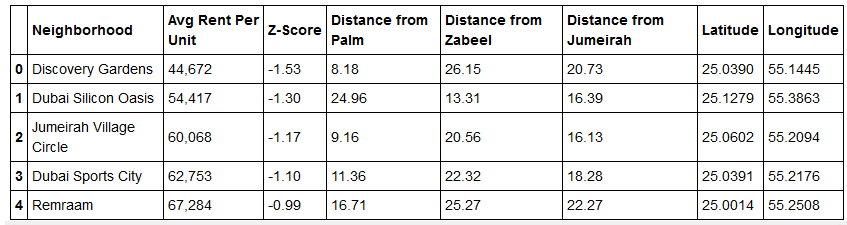

In [ ]:
Geo.dtypes

Neighborhood               object
Avg Rent Per Unit          object
Z-Score                   float64
Distance from Palm        float64
Distance from Zabeel      float64
Distance from Jumeirah    float64
Latitude                  float64
Longitude                 float64
Unnamed: 8                float64
dtype: object

In [ ]:
address = 'Dubai, UAE'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dubai, UAE are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dubai, UAE are 25.0750095, 55.1887608818332.

In [ ]:
# create map of Dubai using latitude and longitude values
map_dubai = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(Geo['Latitude'], Geo['Longitude'], Geo['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dubai)  
    
map_dubai

#Part - initial neighborhood comparison using Foursquare API

In [ ]:
CLIENT_ID = 'AZXSBBAMFPHQ5KE5LIPYHEP5HF0JUW0OW4OCHSXU2DEJNARO' # my Foursquare ID
CLIENT_SECRET = 'KIFRT5M2LWAT5MHJJED30RAEHDTUPHMKCVVYDTBXGRMXQ4P4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AZXSBBAMFPHQ5KE5LIPYHEP5HF0JUW0OW4OCHSXU2DEJNARO
CLIENT_SECRET:KIFRT5M2LWAT5MHJJED30RAEHDTUPHMKCVVYDTBXGRMXQ4P4

#Exploration of Dubai Marina

In [ ]:
#define objects for 'Studio District' index [15] in Geo
neighborhood_latitude = Geo.loc[15, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[15, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[15, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Dubai Marina are 25.0805, 55.1403.

#Now, let's get the top 100 venues that are in Dubai Marina within a radius of 500 meters.

In [ ]:
#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display GET request URL

'https://api.foursquare.com/v2/venues/explore?&client_id= AZXSBBAMFPHQ5KE5LIPYHEP5HF0JUW0OW4OCHSXU2DEJNARO &client_secret= KIFRT5M2LWAT5MHJJED30RAEHDTUPHMKCVVYDTBXGRMXQ4P4
&v=20180605&ll=25.0805,55.1403&radius=500&limit=250'

In [ ]:
results = requests.get(url).json()
results # remove ';' if you want to see json data

{'meta': {'code': 200, 'requestId': '5c1778c94c1f670180e88adb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Dubai Maryna',
  'headerFullLocation': 'Dubai Maryna, Dubai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 98,
  'suggestedBounds': {'ne': {'lat': 25.085000004500007,
    'lng': 55.145259188937594},
   'sw': {'lat': 25.075999995499995, 'lng': 55.13534081106241}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4efc823d0aafc58694fe66d6',
       'name': 'Zaatar w Zeit',
       'location': {'address': 'Marina walk',
        'lat': 25.08003611949958,
        'lng': 55.142305247548414,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08003611949958,
          'lng': 55.142305247548414}],
        'distance': 208,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Marina walk',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4efc823d0aafc58694fe66d6-0'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5606293b498e0f46d6c47f77',
       'name': 'Café Bateel',
       'location': {'address': 'Sadaf 1 , the walk, Jumeirah Beach Residance (JBR)',
        'lat': 25.08182605686763,
        'lng': 55.138065756016424,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08182605686763,
          'lng': 55.138065756016424}],
        'distance': 269,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Sadaf 1 , the walk, Jumeirah Beach Residance (JBR)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16d941735',
         'name': 'Café',
         'pluralName': 'Cafés',
         'shortName': 'Café',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5606293b498e0f46d6c47f77-1'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf9f58bb182c9b6ffcd795a',
       'name': 'Park Island برج پارك آيلاند',
       'location': {'address': 'Dubai Marina',
        'lat': 25.082267422391965,
        'lng': 55.14212662852576,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082267422391965,
          'lng': 55.14212662852576}],
        'distance': 269,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4d954b06a243a5684965b473',
         'name': 'Residential Building (Apartment / Condo)',
         'pluralName': 'Residential Buildings (Apartments / Condos)',
         'shortName': 'Residential',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bf9f58bb182c9b6ffcd795a-2'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f913d8ee4b09d834fccfed2',
       'name': "Mom's Food",
       'location': {'address': 'Park Island',
        'lat': 25.082681165920015,
        'lng': 55.141600204655056,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082681165920015,
          'lng': 55.141600204655056}],
        'distance': 275,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Park Island',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4f913d8ee4b09d834fccfed2-3'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '582d60da5e56b41e7fb680af',
       'name': "MAN'OUSHE STREET (شارع منقوشة)",
       'location': {'address': 'Al Sufouh St',
        'lat': 25.082042,
        'lng': 55.140749,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082042,
          'lng': 55.140749}],
        'distance': 177,
        'cc': 'AE',
        'neighborhood': 'Jumeirah Beach Residence',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Sufouh St',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'shortName': 'Bakery',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-582d60da5e56b41e7fb680af-4'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ff1b27ae4b0db68d50b3494',
       'name': 'Club Stretch',
       'location': {'lat': 25.079336834967965,
        'lng': 55.14225300488557,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079336834967965,
          'lng': 55.14225300488557}],
        'distance': 235,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d102941735',
         'name': 'Yoga Studio',
         'pluralName': 'Yoga Studios',
         'shortName': 'Yoga Studio',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4ff1b27ae4b0db68d50b3494-5'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '597214a1033693233b9924d1',
       'name': 'Blaze Burgers',
       'location': {'address': 'The Walk, JBR',
        'crossStreet': 'Next to Movenpick Hotel',
        'lat': 25.081060562735235,
        'lng': 55.137173849317655,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.081060562735235,
          'lng': 55.137173849317655}],
        'distance': 321,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Walk, JBR (Next to Movenpick Hotel)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16c941735',
         'name': 'Burger Joint',
         'pluralName': 'Burger Joints',
         'shortName': 'Burgers',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-597214a1033693233b9924d1-6'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54637709498e09ae2480cf88',
       'name': 'Jumeriah Beach Residence 1 Tram Station',
       'location': {'lat': 25.079613876544396,
        'lng': 55.13828264949973,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079613876544396,
          'lng': 55.13828264949973}],
        'distance': 226,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '52f2ab2ebcbc57f1066b8b51',
         'name': 'Tram Station',
         'pluralName': 'Tram Stations',
         'shortName': 'Tram',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-54637709498e09ae2480cf88-7'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c2226689085d13a1cd285cc',
       'name': 'Exhale Murjan 1',
       'location': {'lat': 25.081421450115045,
        'lng': 55.14005963242027,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.081421450115045,
          'lng': 55.14005963242027}],
        'distance': 105,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d102941735',
         'name': 'Yoga Studio',
         'pluralName': 'Yoga Studios',
         'shortName': 'Yoga Studio',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4c2226689085d13a1cd285cc-8'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56378707498ef882f85c0c27',
       'name': 'Le Bistro des Arts',
       'location': {'address': 'Dubai Marina Promenade',
        'lat': 25.07781358864863,
        'lng': 55.14035321564484,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07781358864863,
          'lng': 55.14035321564484}],
        'distance': 299,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Promenade',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '52e81612bcbc57f1066b79f1',
         'name': 'Bistro',
         'pluralName': 'Bistros',
         'shortName': 'Bistro',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-56378707498ef882f85c0c27-9'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e32bef01838be8b94cd545d',
       'name': 'The Ritz Carlton JBR - Spa',
       'location': {'address': 'Jumeirah Beach Residence',
        'lat': 25.082614864588802,
        'lng': 55.137952539047184,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082614864588802,
          'lng': 55.137952539047184}],
        'distance': 333,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumeirah Beach Residence',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1ed941735',
         'name': 'Spa',
         'pluralName': 'Spas',
         'shortName': 'Spa',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4e32bef01838be8b94cd545d-10'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fe04b2de4b0f37d580602d3',
       'name': 'Platform 3 Fitness (P3)',
       'location': {'address': 'Park Islands',
        'crossStreet': 'Dubai Marina rd',
        'lat': 25.082351811639956,
        'lng': 55.141237413232666,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082351811639956,
          'lng': 55.141237413232666}],
        'distance': 226,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Park Islands (Dubai Marina rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d175941735',
         'name': 'Gym / Fitness Center',
         'pluralName': 'Gyms or Fitness Centers',
         'shortName': 'Gym / Fitness',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '41915562'}},
      'referralId': 'e-0-4fe04b2de4b0f37d580602d3-11'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53f51e8e11d2ae83c40a6d1c',
       'name': 'InterContinental Dubai Marina',
       'location': {'address': 'Dubai Marina',
        'lat': 25.079065020390953,
        'lng': 55.13751603772567,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079065020390953,
          'lng': 55.13751603772567}],
        'distance': 322,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-53f51e8e11d2ae83c40a6d1c-12'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b55699ef964a520b6e327e3',
       'name': 'Dubai Marina Walk (ممشى مرسى دبي)',
       'location': {'address': 'Dubai Marina',
        'lat': 25.077212974487157,
        'lng': 55.139533281326294,
        'distance': 373,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '56aa371be4b08b9a8d5734c3',
         'name': 'Waterfront',
         'pluralName': 'Waterfronts',
         'shortName': 'Waterfront',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/river_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b55699ef964a520b6e327e3-13'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0587eaf964a52092a622e3',
       'name': 'The Ritz-Carlton Dubai',
       'location': {'address': 'P.O. Box 26525',
        'lat': 25.08264496874942,
        'lng': 55.1374782210072,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08264496874942,
          'lng': 55.1374782210072}],
        'distance': 371,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['P.O. Box 26525',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b0587eaf964a52092a622e3-14'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '516e5213e4b05a9ade61bdff',
       'name': 'The Spa at The Address Dubai Marina',
       'location': {'address': 'Dubai Marina',
        'lat': 25.077540443068468,
        'lng': 55.140873383188136,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077540443068468,
          'lng': 55.140873383188136}],
        'distance': 334,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1ed941735',
         'name': 'Spa',
         'pluralName': 'Spas',
         'shortName': 'Spa',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '69088417'}},
      'referralId': 'e-0-516e5213e4b05a9ade61bdff-15'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51094fc1e4b0ea465e46e989',
       'name': 'Cucina Mia Restaurant',
       'location': {'address': 'Opposite Royal Meridien Hotel JBR',
        'lat': 25.083686349374936,
        'lng': 55.14088913913356,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083686349374936,
          'lng': 55.14088913913356}],
        'distance': 359,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Opposite Royal Meridien Hotel JBR',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110941735',
         'name': 'Italian Restaurant',
         'pluralName': 'Italian Restaurants',
         'shortName': 'Italian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '60742094'}},
      'referralId': 'e-0-51094fc1e4b0ea465e46e989-16'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf0f6fe3a15d13ada153f9f',
       'name': 'Starbucks (ستاربكس)',
       'location': {'address': 'Jumeirah Beach Residence',
        'crossStreet': 'Opposite to the Ritz Carlton Hotel',
        'lat': 25.081102350357092,
        'lng': 55.13724450292884,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.081102350357092,
          'lng': 55.13724450292884}],
        'distance': 315,
        'postalCode': 'AE',
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumeirah Beach Residence (Opposite to the Ritz Carlton Hotel)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bf0f6fe3a15d13ada153f9f-17'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0aaf4af964a5205d2623e3',
       'name': 'Address Dubai Marina',
       'location': {'address': 'Dubai Marina',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.077045147754163,
        'lng': 55.14046920137228,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077045147754163,
          'lng': 55.14046920137228}],
        'distance': 384,
        'postalCode': '32923',
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina (Sheikh Zayed Rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '69088416'}},
      'referralId': 'e-0-4b0aaf4af964a5205d2623e3-18'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '540beaba498e187680d9e0b6',
       'name': 'City Premiere Marina Deluxe Hotel Apartments',
       'location': {'lat': 25.07950867658917,
        'lng': 55.1434385898882,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07950867658917,
          'lng': 55.1434385898882}],
        'distance': 335,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-540beaba498e187680d9e0b6-19'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0587eaf964a5209fa622e3',
       'name': 'Le Royal Méridien Beach Resort & Spa',
       'location': {'address': 'Al Sufouh Rd',
        'lat': 25.08428,
        'lng': 55.14044,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08428,
          'lng': 55.14044}],
        'distance': 421,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina, Dubai',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Sufouh Rd',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d12f951735',
         'name': 'Resort',
         'pluralName': 'Resorts',
         'shortName': 'Resort',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/resort_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b0587eaf964a5209fa622e3-20'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f3ba55ee4b08b7acee3829f',
       'name': 'Shades',
       'location': {'address': 'The Address Dubai Marina',
        'crossStreet': 'Emaar St.',
        'lat': 25.077006654848084,
        'lng': 55.13993184808978,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077006654848084,
          'lng': 55.13993184808978}],
        'distance': 390,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Address Dubai Marina (Emaar St.)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d121941735',
         'name': 'Lounge',
         'pluralName': 'Lounges',
         'shortName': 'Lounge',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '52098819'}},
      'referralId': 'e-0-4f3ba55ee4b08b7acee3829f-21'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55e1e408498e95ee464be025',
       'name': 'Marina Social',
       'location': {'address': 'Level 1, InterContinental Dubai Marina',
        'crossStreet': 'Bay Central',
        'lat': 25.07877191909143,
        'lng': 55.13852679180269,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07877191909143,
          'lng': 55.13852679180269}],
        'distance': 262,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina, Dubai',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Level 1, InterContinental Dubai Marina (Bay Central)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '52e81612bcbc57f1066b79f9',
         'name': 'Modern European Restaurant',
         'pluralName': 'Modern European Restaurants',
         'shortName': 'Modern European',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-55e1e408498e95ee464be025-22'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c497fcc9f2ad13abb5b5d53',
       'name': 'Mazina Restaurant',
       'location': {'address': 'The Address Dubai Marina',
        'lat': 25.077563240524423,
        'lng': 55.14081838550624,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077563240524423,
          'lng': 55.14081838550624}],
        'distance': 331,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Address Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d142941735',
         'name': 'Asian Restaurant',
         'pluralName': 'Asian Restaurants',
         'shortName': 'Asian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '69087776'}},
      'referralId': 'e-0-4c497fcc9f2ad13abb5b5d53-23'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51813f4c498e034fb47e9d31',
       'name': 'Al Shorfa Resturant & Cafe (الشرفة مطعم و مقهى)',
       'location': {'address': 'JBR',
        'crossStreet': 'JBR',
        'lat': 25.083372577625596,
        'lng': 55.1405994199436,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083372577625596,
          'lng': 55.1405994199436}],
        'distance': 321,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR (JBR)', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1c0941735',
         'name': 'Mediterranean Restaurant',
         'pluralName': 'Mediterranean Restaurants',
         'shortName': 'Mediterranean',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51813f4c498e034fb47e9d31-24'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '591190318c35dc6357a02c22',
       'name': 'Rixos Premium Dubai',
       'location': {'address': 'Jumeirah Beach Residence - The Walk',
        'lat': 25.079877753485057,
        'lng': 55.13610769206774,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079877753485057,
          'lng': 55.13610769206774}],
        'distance': 428,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumeirah Beach Residence - The Walk',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-591190318c35dc6357a02c22-25'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d7b222273ca5481c37c467c',
       'name': 'JA Oasis Beach Tower #JAOasisBeachTower',
       'location': {'address': 'Al Fattan Tower',
        'crossStreet': 'The Walk, Jumeirah Beach Residence',
        'lat': 25.07977672110495,
        'lng': 55.13605590751577,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07977672110495,
          'lng': 55.13605590751577}],
        'distance': 435,
        'postalCode': '9255',
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Fattan Tower (The Walk, Jumeirah Beach Residence)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4d7b222273ca5481c37c467c-26'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fdd3fbce4b01d23396afac7',
       'name': 'Address Marina Hotel Fitness Center',
       'location': {'address': 'Dubai Marina',
        'lat': 25.077042984943898,
        'lng': 55.14100793422769,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077042984943898,
          'lng': 55.14100793422769}],
        'distance': 391,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d176941735',
         'name': 'Gym',
         'pluralName': 'Gyms',
         'shortName': 'Gym',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '69088412'}},
      'referralId': 'e-0-4fdd3fbce4b01d23396afac7-27'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52c1476e11d22fac8f7c445c',
       'name': 'Lobby Lounge',
       'location': {'lat': 25.08267889016693,
        'lng': 55.137313099657476,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08267889016693,
          'lng': 55.137313099657476}],
        'distance': 386,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1dc931735',
         'name': 'Tea Room',
         'pluralName': 'Tea Rooms',
         'shortName': 'Tea Room',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-52c1476e11d22fac8f7c445c-28'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0ae8a0f964a520dc2923e3',
       'name': 'Reel Cinemas (ريل سينما)',
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.07656956721927,
        'lng': 55.1400156508692,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07656956721927,
          'lng': 55.1400156508692}],
        'distance': 438,
        'postalCode': '2748',
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Sheikh Zayed Rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d180941735',
         'name': 'Multiplex',
         'pluralName': 'Multiplexes',
         'shortName': 'Cineplex',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b0ae8a0f964a520dc2923e3-29'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c05ee2dd3842d7f68f1be41',
       'name': 'Mövenpick Hotel Jumeirah Beach',
       'location': {'address': 'The Walk',
        'crossStreet': 'Jumeirah Beach Residence',
        'lat': 25.080234945937505,
        'lng': 55.13636896603717,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.080234945937505,
          'lng': 55.13636896603717}],
        'distance': 397,
        'postalCode': '282825',
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Walk (Jumeirah Beach Residence)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4c05ee2dd3842d7f68f1be41-30'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9e5c7ff964a520eddc36e3',
       'name': 'Radisson Blu Residence',
       'location': {'address': 'Plot No. 392-260 Street K Dubai Marina',
        'crossStreet': 'Plot 392-260',
        'lat': 25.078488010930137,
        'lng': 55.14314750429912,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.078488010930137,
          'lng': 55.14314750429912}],
        'distance': 364,
        'cc': 'AE',
        'city': 'Dubai',
        'state': 'Emirate',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Plot No. 392-260 Street K Dubai Marina (Plot 392-260)',
         'Dubai',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b9e5c7ff964a520eddc36e3-31'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cbf2355acd48cfa54c2413f',
       'name': 'Suvoroff',
       'location': {'address': 'Jumeira Beach Residence',
        'lat': 25.080781747734836,
        'lng': 55.1396573631064,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.080781747734836,
          'lng': 55.1396573631064}],
        'distance': 71,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumeira Beach Residence',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d109941735',
         'name': 'Eastern European Restaurant',
         'pluralName': 'Eastern European Restaurants',
         'shortName': 'Eastern European',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4cbf2355acd48cfa54c2413f-32'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227f90d11d22fb8ba38b8d5',
       'name': 'JBR Walk Running Field',
       'location': {'address': 'JBR Walk',
        'lat': 25.081112810176112,
        'lng': 55.13726835798631,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.081112810176112,
          'lng': 55.13726835798631}],
        'distance': 313,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR Walk', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d159941735',
         'name': 'Trail',
         'pluralName': 'Trails',
         'shortName': 'Trail',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5227f90d11d22fb8ba38b8d5-33'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51978473498e459555323a3d',
       'name': 'Pier 7',
       'location': {'address': 'Dubai Marina',
        'lat': 25.076533663693144,
        'lng': 55.138728546916,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076533663693144,
          'lng': 55.138728546916}],
        'distance': 469,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1c4941735',
         'name': 'Restaurant',
         'pluralName': 'Restaurants',
         'shortName': 'Restaurant',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51978473498e459555323a3d-34'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0ad94cf964a520da2823e3',
       'name': 'Dubai Marina Mall (دبي مارينا مول)',
       'location': {'address': 'Dubai Marina',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.07638772324717,
        'lng': 55.13977940216581,
        'distance': 460,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina (Sheikh Zayed Rd)',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fd941735',
         'name': 'Shopping Mall',
         'pluralName': 'Shopping Malls',
         'shortName': 'Mall',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b0ad94cf964a520da2823e3-35'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '584edfe723188e0c097740fb',
       'name': 'Zaroob Restaurant',
       'location': {'address': 'Al Marsa',
        'lat': 25.077894789190783,
        'lng': 55.1432383562656,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077894789190783,
          'lng': 55.1432383562656}],
        'distance': 414,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Marsa', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-584edfe723188e0c097740fb-36'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb1c031f964a5207ea13ce3',
       'name': 'La Sirene Hair Beauty & Spa',
       'location': {'address': 'Al Fattan Marine Tower',
        'crossStreet': 'Jumeira Beach Residence',
        'lat': 25.07978080347724,
        'lng': 55.13619342897744,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07978080347724,
          'lng': 55.13619342897744}],
        'distance': 421,
        'cc': 'AE',
        'neighborhood': 'JBR',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Fattan Marine Tower (Jumeira Beach Residence)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110951735',
         'name': 'Salon / Barbershop',
         'pluralName': 'Salons / Barbershops',
         'shortName': 'Salon / Barbershop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bb1c031f964a5207ea13ce3-37'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54cbc439498ec48ec87d636b',
       'name': 'SALT (سولت)',
       'location': {'lat': 25.0770094086005,
        'lng': 55.13899260676013,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.0770094086005,
          'lng': 55.13899260676013}],
        'distance': 410,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1cb941735',
         'name': 'Food Truck',
         'pluralName': 'Food Trucks',
         'shortName': 'Food Truck',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-54cbc439498ec48ec87d636b-38'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c2180b498e83e89bf5c1d4',
       'name': 'Jouri Gourmet (جوري غورميه)',
       'location': {'lat': 25.079745744492055,
        'lng': 55.14212257428586,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079745744492055,
          'lng': 55.14212257428586}],
        'distance': 202,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d119941735',
         'name': 'Hookah Bar',
         'pluralName': 'Hookah Bars',
         'shortName': 'Hookah Bar',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/hookahbar_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-57c2180b498e83e89bf5c1d4-39'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50ee6dc8e4b03045ab2b8e14',
       'name': 'The Ritz-Carlton Beachfront',
       'location': {'address': 'Jumeirah Beach Resort',
        'lat': 25.083492978518727,
        'lng': 55.136837040113306,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083492978518727,
          'lng': 55.136837040113306}],
        'distance': 482,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumeirah Beach Resort',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e2941735',
         'name': 'Beach',
         'pluralName': 'Beaches',
         'shortName': 'Beach',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/beach_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-50ee6dc8e4b03045ab2b8e14-40'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8caf458b81f047f13cab6c',
       'name': 'The Library Bar @ Ritz Carlton',
       'location': {'address': 'JBR',
        'lat': 25.082607788945417,
        'lng': 55.137347215430516,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082607788945417,
          'lng': 55.137347215430516}],
        'distance': 379,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d121941735',
         'name': 'Lounge',
         'pluralName': 'Lounges',
         'shortName': 'Lounge',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4e8caf458b81f047f13cab6c-41'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ee71a5793adf8e1aa156903',
       'name': 'Shakespeare and Co.',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.076522718650672,
        'lng': 55.139074080294336,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076522718650672,
          'lng': 55.139074080294336}],
        'distance': 459,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16d941735',
         'name': 'Café',
         'pluralName': 'Cafés',
         'shortName': 'Café',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4ee71a5793adf8e1aa156903-42'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '513d907ce4b04f7032bec60b',
       'name': 'Ritz Carlton PoolArea',
       'location': {'lat': 25.083771402104407,
        'lng': 55.137925475787114,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083771402104407,
          'lng': 55.137925475787114}],
        'distance': 435,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d15e941735',
         'name': 'Pool',
         'pluralName': 'Pools',
         'shortName': 'Pool',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-513d907ce4b04f7032bec60b-43'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52cda52e498eb9f880b5c496',
       'name': 'Atelier M',
       'location': {'address': 'Pier 7',
        'crossStreet': 'Marina St',
        'lat': 25.076414816445165,
        'lng': 55.13890786745345,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076414816445165,
          'lng': 55.13890786745345}],
        'distance': 475,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Pier 7 (Marina St)',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d121941735',
         'name': 'Lounge',
         'pluralName': 'Lounges',
         'shortName': 'Lounge',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-52cda52e498eb9f880b5c496-44'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5044d2b6e4b09ae79cfde32d',
       'name': 'Xiao Wei Yang Hot Pot',
       'location': {'address': 'The Walk, Jumeirah Beach Residence',
        'lat': 25.084688,
        'lng': 55.14199,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.084688,
          'lng': 55.14199}],
        'distance': 496,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Walk, Jumeirah Beach Residence',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d145941735',
         'name': 'Chinese Restaurant',
         'pluralName': 'Chinese Restaurants',
         'shortName': 'Chinese',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5044d2b6e4b09ae79cfde32d-45'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b2e029cf964a52060dc24e3',
       'name': 'wagamama',
       'location': {'address': 'JBR',
        'lat': 25.079818811593903,
        'lng': 55.13653437197266,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079818811593903,
          'lng': 55.13653437197266}],
        'distance': 387,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR', 'دبي مارينا', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d142941735',
         'name': 'Asian Restaurant',
         'pluralName': 'Asian Restaurants',
         'shortName': 'Asian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b2e029cf964a52060dc24e3-46'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '587f2de46cea3f620420c1b1',
       'name': 'Nezesaussi Grill',
       'location': {'lat': 25.07705992363335,
        'lng': 55.14113321900368,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07705992363335,
          'lng': 55.14113321900368}],
        'distance': 392,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي مارينا', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d11d941735',
         'name': 'Sports Bar',
         'pluralName': 'Sports Bars',
         'shortName': 'Sports Bar',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/sportsbar_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-587f2de46cea3f620420c1b1-47'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '597dcf9f0e5da85edec38a7d',
       'name': 'SALT',
       'location': {'lat': 25.076753664836613,
        'lng': 55.13904923078617,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076753664836613,
          'lng': 55.13904923078617}],
        'distance': 435,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16c941735',
         'name': 'Burger Joint',
         'pluralName': 'Burger Joints',
         'shortName': 'Burgers',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-597dcf9f0e5da85edec38a7d-48'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd2ede141b9ef3b65e2fee5',
       'name': 'Starbucks (ستاربكس)',
       'location': {'address': 'Sheikh Zayed Rd',
        'lat': 25.07613974216738,
        'lng': 55.14111154974231,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07613974216738,
          'lng': 55.14111154974231}],
        'distance': 492,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Sheikh Zayed Rd',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bd2ede141b9ef3b65e2fee5-49'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5217cc2711d27bb55a037438',
       'name': 'The Address Hotel Residences',
       'location': {'lat': 25.07702234413739,
        'lng': 55.14003268716347,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07702234413739,
          'lng': 55.14003268716347}],
        'distance': 388,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'shortName': 'Hotel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5217cc2711d27bb55a037438-50'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51494fa3e4b0631e06a3fb64',
       'name': 'IHOP (آي هوب)',
       'location': {'address': 'JBR-Unit GM11 Tower JBR 03',
        'lat': 25.07914615978791,
        'lng': 55.135715961587266,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07914615978791,
          'lng': 55.135715961587266}],
        'distance': 486,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR-Unit GM11 Tower JBR 03',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d143941735',
         'name': 'Breakfast Spot',
         'pluralName': 'Breakfast Spots',
         'shortName': 'Breakfast',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51494fa3e4b0631e06a3fb64-51'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '525789ea11d21486eaceca45',
       'name': 'Wingsters وينجستر',
       'location': {'address': 'Marina Diamond 1 Tower, Dubai Marina',
        'crossStreet': 'Street behind the Radisson Blu Residences',
        'lat': 25.08039119160803,
        'lng': 55.14464898703715,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08039119160803,
          'lng': 55.14464898703715}],
        'distance': 438,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Marina Diamond 1 Tower, Dubai Marina (Street behind the Radisson Blu Residences)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d14e941735',
         'name': 'American Restaurant',
         'pluralName': 'American Restaurants',
         'shortName': 'American',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '68900508'}},
      'referralId': 'e-0-525789ea11d21486eaceca45-52'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb099d1f964a520ae4e3ce3',
       'name': 'The Talk Restaurant',
       'location': {'address': 'Mövenpick Hotel Jumeirah Beach',
        'crossStreet': 'JBR Walk',
        'lat': 25.080340936562838,
        'lng': 55.136640125191725,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.080340936562838,
          'lng': 55.136640125191725}],
        'distance': 369,
        'postalCode': '282825',
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Mövenpick Hotel Jumeirah Beach (JBR Walk)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1c4941735',
         'name': 'Restaurant',
         'pluralName': 'Restaurants',
         'shortName': 'Restaurant',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bb099d1f964a520ae4e3ce3-53'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535d35fc498ebcf55348c00d',
       'name': 'Cargo',
       'location': {'address': 'Pier 7',
        'crossStreet': 'Dubai Marina',
        'lat': 25.076834912064143,
        'lng': 55.13871846823104,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076834912064143,
          'lng': 55.13871846823104}],
        'distance': 438,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Pier 7 (Dubai Marina)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d11e941735',
         'name': 'Cocktail Bar',
         'pluralName': 'Cocktail Bars',
         'shortName': 'Cocktail',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-535d35fc498ebcf55348c00d-54'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '542081db498e1ced3bb27265',
       'name': 'Asia Asia',
       'location': {'address': 'Pier 7',
        'lat': 25.076587712859634,
        'lng': 55.138777047642364,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076587712859634,
          'lng': 55.138777047642364}],
        'distance': 461,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Pier 7', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d111941735',
         'name': 'Japanese Restaurant',
         'pluralName': 'Japanese Restaurants',
         'shortName': 'Japanese',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-542081db498e1ced3bb27265-55'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50efb04ee4b0ce20266463a7',
       'name': 'Simsim (سمسم)',
       'location': {'address': 'JBR',
        'lat': 25.08070764332202,
        'lng': 55.136839291558665,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08070764332202,
          'lng': 55.136839291558665}],
        'distance': 349,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-50efb04ee4b0ce20266463a7-56'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4efe1803722e0f07705ab46e',
       'name': 'Starbucks',
       'location': {'address': 'دبي',
        'crossStreet': 'جي بي ار',
        'lat': 25.08118242148295,
        'lng': 55.13727353795743,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08118242148295,
          'lng': 55.13727353795743}],
        'distance': 314,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي (جي بي ار)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4efe1803722e0f07705ab46e-57'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '569887db498e61bda9853dc9',
       'name': '136.1 Yoga Studio',
       'location': {'lat': 25.081609371927872,
        'lng': 55.14497979327985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.081609371927872,
          'lng': 55.14497979327985}],
        'distance': 487,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d102941735',
         'name': 'Yoga Studio',
         'pluralName': 'Yoga Studios',
         'shortName': 'Yoga Studio',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-569887db498e61bda9853dc9-58'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53f771da498e78515eadb0f8',
       'name': 'Uchkuduk - Uzbek Cuisine',
       'location': {'address': 'Trident Grand Residence',
        'crossStreet': 'Across From Habtoor Grand Hotel',
        'lat': 25.083976249462456,
        'lng': 55.1410717414167,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083976249462456,
          'lng': 55.1410717414167}],
        'distance': 394,
        'postalCode': '9244',
        'cc': 'AE',
        'neighborhood': 'JBR',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Trident Grand Residence (Across From Habtoor Grand Hotel)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '5293a7563cf9994f4e043a44',
         'name': 'Russian Restaurant',
         'pluralName': 'Russian Restaurants',
         'shortName': 'Russian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/russian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '94732145'}},
      'referralId': 'e-0-53f771da498e78515eadb0f8-59'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51aa2aec498e0f1331d0fb90',
       'name': 'Blue Jade',
       'location': {'address': 'The Walk at JBR',
        'lat': 25.082759185963678,
        'lng': 55.13757288191048,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082759185963678,
          'lng': 55.13757288191048}],
        'distance': 372,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Walk at JBR',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d142941735',
         'name': 'Asian Restaurant',
         'pluralName': 'Asian Restaurants',
         'shortName': 'Asian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51aa2aec498e0f1331d0fb90-60'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52dccb89498ec95c36002d70',
       'name': "Massimo's",
       'location': {'address': 'Park Island Dubai Marina',
        'lat': 25.08238107046071,
        'lng': 55.14274807646712,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08238107046071,
          'lng': 55.14274807646712}],
        'distance': 323,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Park Island Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110941735',
         'name': 'Italian Restaurant',
         'pluralName': 'Italian Restaurants',
         'shortName': 'Italian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '76756936'}},
      'referralId': 'e-0-52dccb89498ec95c36002d70-61'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5982643b16ef675760114589',
       'name': 'Black Tap Craft Burgers & Shakes',
       'location': {'crossStreet': 'Salman Bin Abdulaziz',
        'lat': 25.079816016099613,
        'lng': 55.136243525560914,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.079816016099613,
          'lng': 55.136243525560914}],
        'distance': 416,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Salman Bin Abdulaziz',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16c941735',
         'name': 'Burger Joint',
         'pluralName': 'Burger Joints',
         'shortName': 'Burgers',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5982643b16ef675760114589-62'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4df76f981838c789e8b969a1',
       'name': 'Caracalla Spa & Health Club @ Le Royal Meridien',
       'location': {'lat': 25.0842029257964,
        'lng': 55.13989257196537,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.0842029257964,
          'lng': 55.13989257196537}],
        'distance': 414,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d175941735',
         'name': 'Gym / Fitness Center',
         'pluralName': 'Gyms or Fitness Centers',
         'shortName': 'Gym / Fitness',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4df76f981838c789e8b969a1-63'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9e5fccf964a52000de36e3',
       'name': 'Brasserie',
       'location': {'address': 'Royal Meridien',
        'lat': 25.084758451256718,
        'lng': 55.13981064578634,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.084758451256718,
          'lng': 55.13981064578634}],
        'distance': 476,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Royal Meridien',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d10c941735',
         'name': 'French Restaurant',
         'pluralName': 'French Restaurants',
         'shortName': 'French',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b9e5fccf964a52000de36e3-64'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b74c23df964a5207af02de3',
       'name': 'Al Fattan Marine Towers',
       'location': {'address': 'JBR',
        'lat': 25.07975336316278,
        'lng': 55.13614366489748,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07975336316278,
          'lng': 55.13614366489748}],
        'distance': 427,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1fd941735',
         'name': 'Shopping Mall',
         'pluralName': 'Shopping Malls',
         'shortName': 'Mall',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b74c23df964a5207af02de3-65'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '511a5152e4b0030c61c31b77',
       'name': 'La Baie Lounge',
       'location': {'address': 'The Ritz Carlton Dubai',
        'crossStreet': 'P.O. Box 26525',
        'lat': 25.08351654792218,
        'lng': 55.13725500262663,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08351654792218,
          'lng': 55.13725500262663}],
        'distance': 454,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Ritz Carlton Dubai (P.O. Box 26525)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d144941735',
         'name': 'Caribbean Restaurant',
         'pluralName': 'Caribbean Restaurants',
         'shortName': 'Caribbean',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/caribbean_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-511a5152e4b0030c61c31b77-66'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cb5dc9664998cfaae0711a2',
       'name': 'Rhodes Twenty10',
       'location': {'address': 'Le Royal Meridien Beach Resort & Spa',
        'crossStreet': 'Al Sufouh Road',
        'lat': 25.084830735996913,
        'lng': 55.139704784881005,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.084830735996913,
          'lng': 55.139704784881005}],
        'distance': 485,
        'postalCode': '24970',
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Le Royal Meridien Beach Resort & Spa (Al Sufouh Road)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1cc941735',
         'name': 'Steakhouse',
         'pluralName': 'Steakhouses',
         'shortName': 'Steakhouse',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/steakhouse_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '90259360'}},
      'referralId': 'e-0-4cb5dc9664998cfaae0711a2-67'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4efecca09a520dfd656668a9',
       'name': 'Club Lounge',
       'location': {'address': 'Ritz Carlton Dubai',
        'crossStreet': 'JBR',
        'lat': 25.08324111591411,
        'lng': 55.13762550374704,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08324111591411,
          'lng': 55.13762550374704}],
        'distance': 407,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Ritz Carlton Dubai (JBR)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d121941735',
         'name': 'Lounge',
         'pluralName': 'Lounges',
         'shortName': 'Lounge',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4efecca09a520dfd656668a9-68'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51d2a176498e072a57f83221',
       'name': 'Sephora',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.076760930524483,
        'lng': 55.139278897111886,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076760930524483,
          'lng': 55.139278897111886}],
        'distance': 428,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d10c951735',
         'name': 'Cosmetics Shop',
         'pluralName': 'Cosmetics Shops',
         'shortName': 'Cosmetics',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/beauty_cosmetic_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51d2a176498e072a57f83221-69'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55f7ef86498ef0f83de007e6',
       'name': 'Five Guys',
       'location': {'address': 'The Exchange 5 Market St.',
        'lat': 25.077067370642464,
        'lng': 55.13943753037929,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077067370642464,
          'lng': 55.13943753037929}],
        'distance': 391,
        'postalCode': 'BD1 1EG',
        'cc': 'AE',
        'city': 'Bradford',
        'state': 'West Yorkshire',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Exchange 5 Market St.',
         'Bradford',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16c941735',
         'name': 'Burger Joint',
         'pluralName': 'Burger Joints',
         'shortName': 'Burgers',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-55f7ef86498ef0f83de007e6-70'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50f56773e4b04c8b3f4c3deb',
       'name': 'Sarouja',
       'location': {'address': 'Al Sufouh Rd, before JBR Rd',
        'crossStreet': 'شارع الصفوح قبل مدخل الممشى',
        'lat': 25.083911445807587,
        'lng': 55.143159056460846,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.083911445807587,
          'lng': 55.143159056460846}],
        'distance': 476,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Sufouh Rd, before JBR Rd (شارع الصفوح قبل مدخل الممشى)',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '83161979'}},
      'referralId': 'e-0-50f56773e4b04c8b3f4c3deb-71'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b485a67f964a5200c4c26e3',
       'name': 'Le Pain Quotidien',
       'location': {'address': 'Jumairah Beach Residence, Rimal Building, The Walk',
        'crossStreet': 'Jumeirah Beach Residence',
        'lat': 25.077059,
        'lng': 55.140205,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077059,
          'lng': 55.140205}],
        'distance': 383,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Jumairah Beach Residence, Rimal Building, The Walk (Jumeirah Beach Residence)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d10c941735',
         'name': 'French Restaurant',
         'pluralName': 'French Restaurants',
         'shortName': 'French',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b485a67f964a5200c4c26e3-72'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c4c6a479c8d2d7f5479646c',
       'name': 'Kambaa',
       'location': {'address': 'The Address Dubai Marina',
        'lat': 25.07679281677242,
        'lng': 55.141201004166746,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07679281677242,
          'lng': 55.141201004166746}],
        'distance': 422,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Address Dubai Marina',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '69088414'}},
      'referralId': 'e-0-4c4c6a479c8d2d7f5479646c-73'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51829db3498ef68cdf0e46bf',
       'name': 'Abd El Wahab (عبد الوهاب)',
       'location': {'address': 'Pier 7',
        'lat': 25.076847904842317,
        'lng': 55.13877165867141,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076847904842317,
          'lng': 55.13877165867141}],
        'distance': 434,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Pier 7', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '58daa1558bbb0b01f18ec1cd',
         'name': 'Lebanese Restaurant',
         'pluralName': 'Lebanese Restaurants',
         'shortName': 'Lebanese',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-51829db3498ef68cdf0e46bf-74'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bcc4c7d937ca593a8cfaa92',
       'name': "McDonald's (ماكدونالدز)",
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.076540434701247,
        'lng': 55.139264863214315,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076540434701247,
          'lng': 55.139264863214315}],
        'distance': 452,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Sheikh Zayed Rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d16e941735',
         'name': 'Fast Food Restaurant',
         'pluralName': 'Fast Food Restaurants',
         'shortName': 'Fast Food',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bcc4c7d937ca593a8cfaa92-75'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9e60d8f964a5204dde36e3',
       'name': 'Waitrose',
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.077098716241615,
        'lng': 55.13918474505592,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077098716241615,
          'lng': 55.13918474505592}],
        'distance': 394,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Sheikh Zayed Rd)',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
         'name': 'Supermarket',
         'pluralName': 'Supermarkets',
         'shortName': 'Supermarket',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b9e60d8f964a5204dde36e3-76'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53f87ccb498e9554d54ef030',
       'name': 'The Scene by Simon Rimmer',
       'location': {'address': 'Pier7 - 4th Floor',
        'lat': 25.07677751810005,
        'lng': 55.13864413810276,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07677751810005,
          'lng': 55.13864413810276}],
        'distance': 446,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina, Dubai',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Pier7 - 4th Floor',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '52e81612bcbc57f1066b7a05',
         'name': 'English Restaurant',
         'pluralName': 'English Restaurants',
         'shortName': 'English',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '97187455'}},
      'referralId': 'e-0-53f87ccb498e9554d54ef030-77'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5036691fe4b053240d1481a5',
       'name': 'Speakeasy Bar & Restaurant',
       'location': {'address': 'Lower Plaza (LP) Level, Ramada Plaza Jumeirah Beach',
        'crossStreet': 'Bahar 7',
        'lat': 25.078157696889715,
        'lng': 55.13621159806166,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.078157696889715,
          'lng': 55.13621159806166}],
        'distance': 487,
        'postalCode': '118555',
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Lower Plaza (LP) Level, Ramada Plaza Jumeirah Beach (Bahar 7)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1d4941735',
         'name': 'Speakeasy',
         'pluralName': 'Speakeasies',
         'shortName': 'Speakeasy',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/secretbar_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5036691fe4b053240d1481a5-78'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50731ab2e4b0e1b65f67f0df',
       'name': 'Amaseena',
       'location': {'address': 'JBR Road',
        'lat': 25.082362,
        'lng': 55.136658,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082362,
          'lng': 55.136658}],
        'distance': 421,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['JBR Road', 'دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d115941735',
         'name': 'Middle Eastern Restaurant',
         'pluralName': 'Middle Eastern Restaurants',
         'shortName': 'Middle Eastern',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-50731ab2e4b0e1b65f67f0df-79'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5224302611d2ebf3dbc7463d',
       'name': 'Infinity Pool / Shades',
       'location': {'lat': 25.0770232900724,
        'lng': 55.1401969471159,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.0770232900724,
          'lng': 55.1401969471159}],
        'distance': 387,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d15e941735',
         'name': 'Pool',
         'pluralName': 'Pools',
         'shortName': 'Pool',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5224302611d2ebf3dbc7463d-80'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ce7d39dfe90a35d86ad3e0e',
       'name': 'Favorite Things',
       'location': {'address': 'Marina Mall',
        'lat': 25.076681348317113,
        'lng': 55.13969856668666,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076681348317113,
          'lng': 55.13969856668666}],
        'distance': 429,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Marina Mall', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d118951735',
         'name': 'Grocery Store',
         'pluralName': 'Grocery Stores',
         'shortName': 'Grocery Store',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4ce7d39dfe90a35d86ad3e0e-81'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59dbbd3f51950e4b1aaa74bd',
       'name': 'Inner City Zoo',
       'location': {'address': 'Rixos Premium Hotel',
        'crossStreet': 'JBR',
        'lat': 25.080344861963752,
        'lng': 55.13562478239317,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.080344861963752,
          'lng': 55.13562478239317}],
        'distance': 471,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Rixos Premium Hotel (JBR)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d11f941735',
         'name': 'Nightclub',
         'pluralName': 'Nightclubs',
         'shortName': 'Nightclub',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-59dbbd3f51950e4b1aaa74bd-82'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b72cfa3f964a520d1892de3',
       'name': 'Café Nero (كافيه نيرو)',
       'location': {'address': 'Al Marsa St',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.076150158587446,
        'lng': 55.14109737813229,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076150158587446,
          'lng': 55.14109737813229}],
        'distance': 490,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Marsa St (Sheikh Zayed Rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b72cfa3f964a520d1892de3-83'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5152ee13e4b0563568bcc79f',
       'name': 'Costa Coffee',
       'location': {'address': 'Dubai Marina Mall Promenade',
        'lat': 25.07701883839699,
        'lng': 55.13987640484194,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07701883839699,
          'lng': 55.13987640484194}],
        'distance': 389,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall Promenade',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5152ee13e4b0563568bcc79f-84'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf6546e9abec9b66b9a25e8',
       'name': 'Ted baker',
       'location': {'address': 'Dubai marina mall',
        'lat': 25.076101499790184,
        'lng': 55.14125169919437,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076101499790184,
          'lng': 55.14125169919437}],
        'distance': 498,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai marina mall',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d103951735',
         'name': 'Clothing Store',
         'pluralName': 'Clothing Stores',
         'shortName': 'Apparel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bf6546e9abec9b66b9a25e8-85'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '510d51d8e4b0faae32ccdd13',
       'name': 'Conti Confetteria Milano',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.07622108490372,
        'lng': 55.14141229525668,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07622108490372,
          'lng': 55.14141229525668}],
        'distance': 489,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-510d51d8e4b0faae32ccdd13-86'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4edcc6429a5286d92221099a',
       'name': 'H&M',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.07643,
        'lng': 55.140504,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07643,
          'lng': 55.140504}],
        'distance': 453,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d103951735',
         'name': 'Clothing Store',
         'pluralName': 'Clothing Stores',
         'shortName': 'Apparel',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4edcc6429a5286d92221099a-87'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc73f9d6501c9b6ae053e29',
       'name': "Carluccio's (كارليوكوس)",
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Marina St',
        'lat': 25.077000219883292,
        'lng': 55.13905151887153,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.077000219883292,
          'lng': 55.13905151887153}],
        'distance': 409,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Marina St)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110941735',
         'name': 'Italian Restaurant',
         'pluralName': 'Italian Restaurants',
         'shortName': 'Italian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4bc73f9d6501c9b6ae053e29-88'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ca3789cd7c337043c43a162',
       'name': 'Splendido',
       'location': {'address': 'The Ritz Carlton Dubai',
        'crossStreet': 'JBR',
        'lat': 25.08302937610757,
        'lng': 55.13745597135421,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08302937610757,
          'lng': 55.13745597135421}],
        'distance': 401,
        'cc': 'AE',
        'city': 'دبي مارينا',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['The Ritz Carlton Dubai (JBR)',
         'دبي مارينا',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110941735',
         'name': 'Italian Restaurant',
         'pluralName': 'Italian Restaurants',
         'shortName': 'Italian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4ca3789cd7c337043c43a162-89'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4befc1fed4e4d13a598d15a7',
       'name': 'Baskin Robbins',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.076562452090478,
        'lng': 55.13937118381883,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076562452090478,
          'lng': 55.13937118381883}],
        'distance': 448,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1c9941735',
         'name': 'Ice Cream Shop',
         'pluralName': 'Ice Cream Shops',
         'shortName': 'Ice Cream',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4befc1fed4e4d13a598d15a7-90'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f74ceb50039782e9c33d1c2',
       'name': 'Monte Carlo Stars Dubai Marina',
       'location': {'address': 'Al Sufouh Road',
        'crossStreet': 'Marina Quays Residences',
        'lat': 25.076957527652407,
        'lng': 55.137323878006875,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076957527652407,
          'lng': 55.137323878006875}],
        'distance': 495,
        'postalCode': '487005',
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Al Sufouh Road (Marina Quays Residences)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1c4941735',
         'name': 'Restaurant',
         'pluralName': 'Restaurants',
         'shortName': 'Restaurant',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4f74ceb50039782e9c33d1c2-91'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54a9141f498e09cb2b01a864',
       'name': 'Virgin Megastore',
       'location': {'address': 'Dubai Marina Mall',
        'lat': 25.076695022108684,
        'lng': 55.1390782318056,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076695022108684,
          'lng': 55.1390782318056}],
        'distance': 441,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d10d951735',
         'name': 'Record Shop',
         'pluralName': 'Record Shops',
         'shortName': 'Record Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/record_shop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-54a9141f498e09cb2b01a864-92'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b88fc2af964a520b81632e3',
       'name': 'Yo! Sushi',
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Sheikh Zayed Rd',
        'lat': 25.076844582574626,
        'lng': 55.13894826741572,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.076844582574626,
          'lng': 55.13894826741572}],
        'distance': 429,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Sheikh Zayed Rd)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d1d2941735',
         'name': 'Sushi Restaurant',
         'pluralName': 'Sushi Restaurants',
         'shortName': 'Sushi',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4b88fc2af964a520b81632e3-93'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d4d4fdc13d88cfa3c5c07da',
       'name': 'Borders Express',
       'location': {'address': 'Dubai Marina Mall',
        'crossStreet': 'Street E',
        'lat': 25.07687184056606,
        'lng': 55.13903961075847,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07687184056606,
          'lng': 55.13903961075847}],
        'distance': 423,
        'cc': 'AE',
        'neighborhood': 'Dubai Marina',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Dubai Marina Mall (Street E)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d114951735',
         'name': 'Bookstore',
         'pluralName': 'Bookstores',
         'shortName': 'Bookstore',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4d4d4fdc13d88cfa3c5c07da-94'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e25a61252b17b2b5dd041db',
       'name': 'Mamma Mia Ristorante & Pizzeria',
       'location': {'address': 'Radisson Blu',
        'crossStreet': 'Dubai Marina - just before Marina Mall',
        'lat': 25.07843826610692,
        'lng': 55.14378893811336,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.07843826610692,
          'lng': 55.14378893811336}],
        'distance': 420,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['Radisson Blu (Dubai Marina - just before Marina Mall)',
         'دبي',
         'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d110941735',
         'name': 'Italian Restaurant',
         'pluralName': 'Italian Restaurants',
         'shortName': 'Italian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []},
       'venuePage': {'id': '44029721'}},
      'referralId': 'e-0-4e25a61252b17b2b5dd041db-95'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '539a9497498e9480b6799f5f',
       'name': 'Caravan',
       'location': {'lat': 25.082675413702013,
        'lng': 55.137315168722296,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.082675413702013,
          'lng': 55.137315168722296}],
        'distance': 386,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['دبي', 'الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d143941735',
         'name': 'Breakfast Spot',
         'pluralName': 'Breakfast Spots',
         'shortName': 'Breakfast',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-539a9497498e9480b6799f5f-96'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5485e239498e4eca5a3f8e2e',
       'name': 'Blue Jade Restaurant Ritz Carlton Restaurant',
       'location': {'lat': 25.08309502325006,
        'lng': 55.1374890932729,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.08309502325006,
          'lng': 55.1374890932729}],
        'distance': 404,
        'cc': 'AE',
        'country': 'الإمارات العربية المتحدة',
        'formattedAddress': ['الإمارات العربية المتحدة']},
       'categories': [{'id': '4bf58dd8d48988d142941735',
         'name': 'Asian Restaurant',
         'pluralName': 'Asian Restaurants',
         'shortName': 'Asian',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5485e239498e4eca5a3f8e2e-97'}]}]}}

#clean the json and structure it into a pandas dataframe.

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
df_Marina = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Marina = df_Marina.loc[:, filtered_columns]

# filter the category for each row
df_Marina['venue.categories'] = df_Marina.apply(get_category_type, axis=1)

# clean columns

df_Marina.columns = [col.split(".")[-1] for col in df_Marina.columns]
df_Marina.insert(0, 'neighborhood', 'Dubai Marina')

print('{} venues were returned by Foursquare.'.format(df.shape[0]))
df_Marina.head()

98 venues were returned by Foursquare.

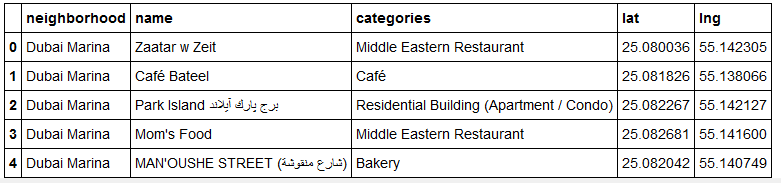

#create a map of the Marina district and highlight nearby venues

In [ ]:
map_marina = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_Marina['lat'], df_Marina['lng'], df_Marina['name'], df_Marina['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_marina) 
    
map_marina

In [ ]:
marina_venues['categories'].value_counts()

Hotel                                       9
Coffee Shop                                 7
Middle Eastern Restaurant                   6
Italian Restaurant                          5
Burger Joint                                4
Asian Restaurant                            4
Lounge                                      4
Restaurant                                  3
Yoga Studio                                 3
Spa                                         2
Gym / Fitness Center                        2
Café                                        2
French Restaurant                           2
Clothing Store                              2
Pool                                        2
Shopping Mall                               2
Breakfast Spot                              2
Waterfront                                  1
Speakeasy                                   1
Grocery Store                               1
Bistro                                      1
Modern European Restaurant                  1
Hookah Bar                                  1
Nightclub                                   1
Gym                                         1
Multiplex                                   1
Beach                                       1
Caribbean Restaurant                        1
Eastern European Restaurant                 1
Fast Food Restaurant                        1
Record Shop                                 1
Salon / Barbershop                          1
Trail                                       1
Tea Room                                    1
Steakhouse                                  1
Bakery                                      1
American Restaurant                         1
Residential Building (Apartment / Condo)    1
Chinese Restaurant                          1
Sports Bar                                  1
Russian Restaurant                          1
Bookstore                                   1
Ice Cream Shop                              1
Resort                                      1
Supermarket                                 1
Lebanese Restaurant                         1
Food Truck                                  1
Cosmetics Shop                              1
Tram Station                                1
Sushi Restaurant                            1
Cocktail Bar                                1
Japanese Restaurant                         1
English Restaurant                          1
Mediterranean Restaurant                    1
Name: categories, dtype: int64

#Creation of a similar dataframe for each neighborhood:¶
index # 9 - Al Sufouh

In [ ]:
#define objects for 'Al Soufouh' index [9] in Geo
neighborhood_latitude = Geo.loc[9, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[9, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[9, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_ASufouh = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_ASufouh = df_ASufouh.loc[:, filtered_columns]

# filter the category for each row
df_ASufouh['venue.categories'] = df_ASufouh.apply(get_category_type, axis=1)

# clean columns

df_ASufouh.columns = [col.split(".")[-1] for col in df_ASufouh.columns]
df_ASufouh.insert(0, 'neighborhood', 'Al Sufouh')

print('{} venues were returned by Foursquare.'.format(df_ASufouh.shape[0]))
df_ASufouh.head()

5 venues were returned by Foursquare.

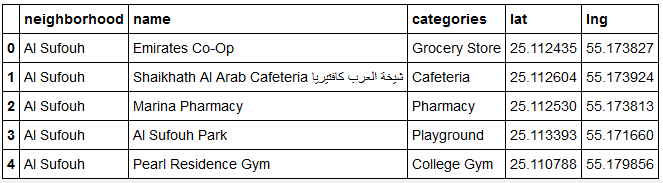

index # 10 DIFC

In [ ]:
#define objects for 'DIFC' index [10] in Geo
neighborhood_latitude = Geo.loc[10, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[10, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[10, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_DIFC = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_DIFC = df_DIFC.loc[:, filtered_columns]

# filter the category for each row
df_DIFC['venue.categories'] = df_DIFC.apply(get_category_type, axis=1)

# clean columns

df_DIFC.columns = [col.split(".")[-1] for col in df_DIFC.columns]
df_DIFC.insert(0, 'neighborhood', 'DIFC')

print('{} venues were returned by Foursquare.'.format(df_DIFC.shape[0]))
df_DIFC.head()

75 venues were returned by Foursquare.

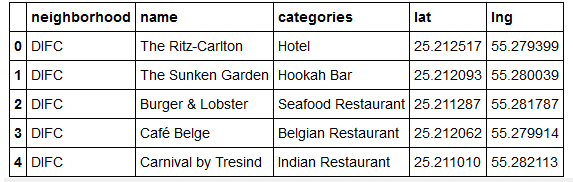

index # 11 Business Bay

In [ ]:
#define objects for 'Business_Bay' index [11] in Geo
neighborhood_latitude = Geo.loc[11, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[11, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[11, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_Business_Bay = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Business_Bay = df_Business_Bay.loc[:, filtered_columns]

# filter the category for each row
df_Business_Bay['venue.categories'] = df_Business_Bay.apply(get_category_type, axis=1)

# clean columns

df_Business_Bay.columns = [col.split(".")[-1] for col in df_Business_Bay.columns]
df_Business_Bay.insert(0, 'neighborhood', 'Business Bay')

print('{} venues were returned by Foursquare.'.format(df_Business_Bay.shape[0]))
df_Business_Bay.head()



22 venues were returned by Foursquare.

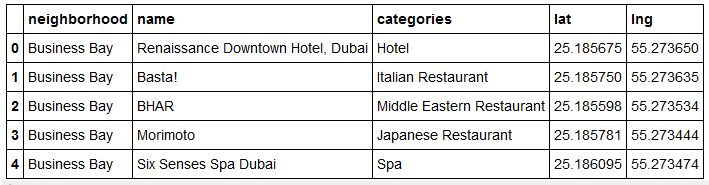

#index # 12 Jumeirah Lakes Towers

In [ ]:
#define objects for 'JLT' index [12] in Geo
neighborhood_latitude = Geo.loc[12, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[12, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[12, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_JLT = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_JLT = df_JLT.loc[:, filtered_columns]

# filter the category for each row
df_JLT['venue.categories'] = df_JLT.apply(get_category_type, axis=1)

# clean columns

df_JLT.columns = [col.split(".")[-1] for col in df_JLT.columns]
df_JLT.insert(0, 'neighborhood', 'Jumeirah Lakes Towers')

print('{} venues were returned by Foursquare.'.format(df_JLT.shape[0]))
df_JLT.head()

33 venues were returned by Foursquare.

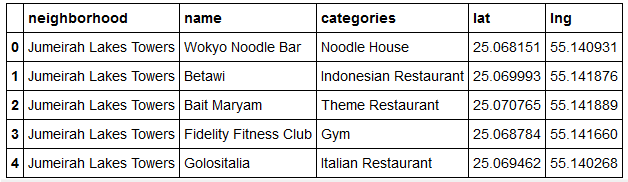

#index 13 Barsha Heights

In [ ]:
#define objects for 'Barsha' index [12] in Geo
neighborhood_latitude = Geo.loc[13, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[13, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[13, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_Barsha = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Barsha = df_Barsha.loc[:, filtered_columns]

# filter the category for each row
df_Barsha['venue.categories'] = df_Barsha.apply(get_category_type, axis=1)

# clean columns

df_Barsha.columns = [col.split(".")[-1] for col in df_Barsha.columns]
df_Barsha.insert(0, 'neighborhood', 'Barsha Heights')

print('{} venues were returned by Foursquare.'.format(df_Barsha.shape[0]))
df_Barsha.head()

62 venues were returned by Foursquare.

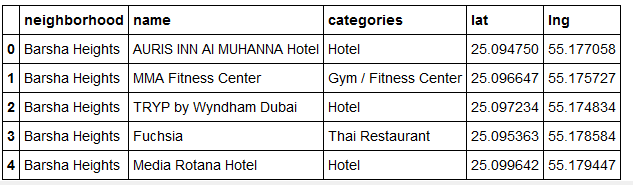

#Analysis of venuw distribution

In [ ]:
df_venues = pd.concat([df_Barsha, df_JLT, df_Business_Bay, df_DIFC, df_Marina, df_ASufouh])
df_venues['count'] = 1
df_venues.shape

(295, 6)

In [ ]:
total_venues = pd.pivot_table(df_venues,index=["neighborhood"], values=["count"],aggfunc=np.sum)
total_venues

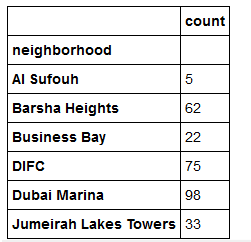

In [ ]:
df_venues2 = df_venues.copy()
df_venues3 = df_venues.copy()
df_venues_rest = df_venues2[df_venues2['categories'].str.contains('Restaurant')].reset_index(drop=True)
df_venues_rest['Venue Type'] = 'Restaurant'
df_venues_hotel = df_venues3[df_venues3['categories'].str.contains('Hotel')].reset_index(drop=True)
df_venues_hotel['Venue Type'] = 'Hotel'
df_venues_final = pd.concat([df_venues_rest,df_venues_hotel]).reset_index(drop=True)
df_venues_final.shape

(133, 7)

In [ ]:
pivot = pd.pivot_table(df_venues_final,index=["neighborhood","Venue Type"], values=["count"],aggfunc=np.sum)
pivot

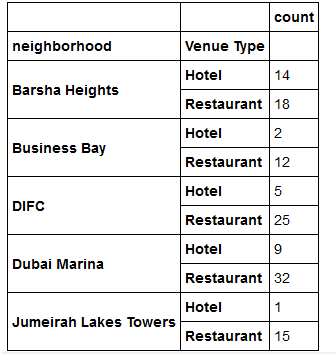

In [ ]:
df_venues_final.groupby('neighborhood')['Venue Type']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

<matplotlib.axes._subplots.AxesSubplot at 0x1a1fa501d0>

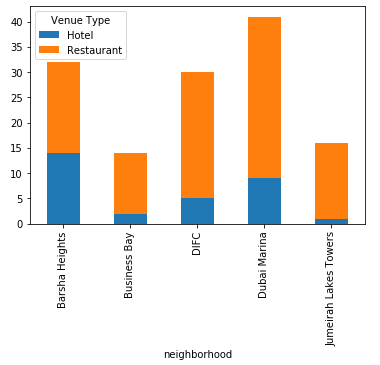

#Create 'one hot' file with dummy values by venue category

In [ ]:
# one hot encoding
dubai_onehot = pd.get_dummies(df_venues_final[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dubai_onehot['neighborhood'] = df_venues_final['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

dubai_onehot.head()

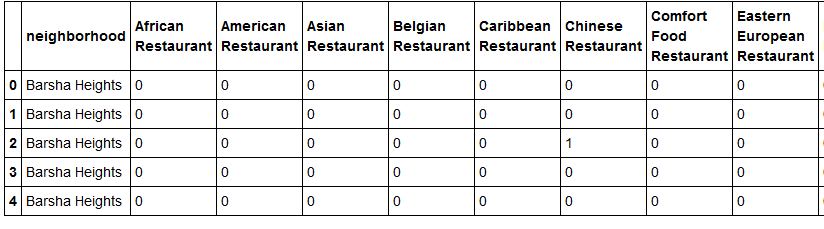

#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
dubai_grouped = dubai_onehot.groupby('neighborhood').mean().reset_index()
dubai_grouped

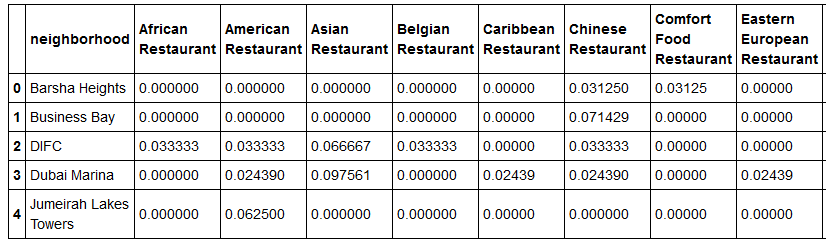

In [ ]:
dubai_grouped.shape

(5, 36)

#Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 5

for hood in dubai_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = dubai_grouped[dubai_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barsha Heights----
                       venue  freq
0                      Hotel  0.41
1  Middle Eastern Restaurant  0.19
2         Italian Restaurant  0.06
3            Thai Restaurant  0.06
4         Mexican Restaurant  0.03


----Business Bay----
                       venue  freq
0                 Restaurant  0.21
1         Italian Restaurant  0.14
2  Middle Eastern Restaurant  0.14
3                      Hotel  0.14
4          German Restaurant  0.07


----DIFC----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.13
2          Restaurant  0.10
3   Indian Restaurant  0.10
4    Asian Restaurant  0.07


----Dubai Marina----
                       venue  freq
0                      Hotel  0.22
1  Middle Eastern Restaurant  0.15
2         Italian Restaurant  0.12
3           Asian Restaurant  0.10
4                 Restaurant  0.07


----Jumeirah Lakes Towers----
                   venue  freq
0     Italian Restaurant  0.19
1  Vietnamese Restaurant  0.12
2             Restaurant  0.06
3      Korean Restaurant  0.06
4       Theme Restaurant  0.06

#First, let's write a function to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = dubai_grouped['neighborhood']

for ind in np.arange(dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

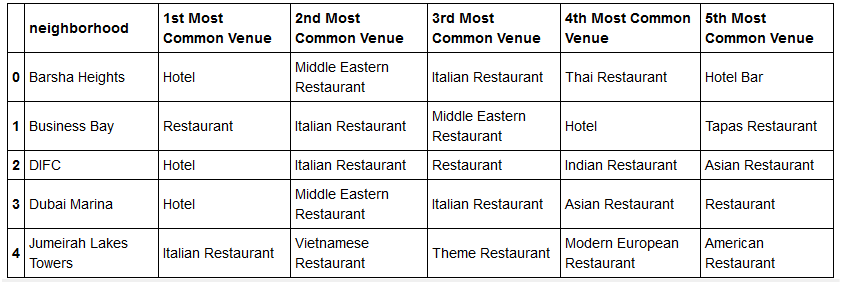

In [ ]:
#define objects for 'DIFC' index [10] in Geo
neighborhood_latitude = Geo.loc[10, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[10, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[10, 'Neighborhood'] # neighborhood name

map_DIFC = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_DIFC['lat'], df_DIFC['lng'], df_DIFC['name'], df_DIFC['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_DIFC) 
    
map_DIFC

